#Model

In [ ]:
import torch.nn as nn

class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()

        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3_1 = nn.BatchNorm2d(256)
        self.relu3_1 = nn.ReLU(inplace=True)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn3_2 = nn.BatchNorm2d(256)
        self.relu3_2 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 4
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4_1 = nn.BatchNorm2d(512)
        self.relu4_1 = nn.ReLU(inplace=True)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn4_2 = nn.BatchNorm2d(512)
        self.relu4_2 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 5
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn5_1 = nn.BatchNorm2d(512)
        self.relu5_1 = nn.ReLU(inplace=True)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn5_2 = nn.BatchNorm2d(512)
        self.relu5_2 = nn.ReLU(inplace=True)
        self.maxpool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 10)  # Assuming 10 classes for classification

    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)

        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)

        x = self.relu3_1(self.bn3_1(self.conv3_1(x)))
        x = self.relu3_2(self.bn3_2(self.conv3_2(x)))
        x = self.maxpool3(x)

        x = self.relu4_1(self.bn4_1(self.conv4_1(x)))
        x = self.relu4_2(self.bn4_2(self.conv4_2(x)))
        x = self.maxpool4(x)

        x = self.relu5_1(self.bn5_1(self.conv5_1(x)))
        x = self.relu5_2(self.bn5_2(self.conv5_2(x)))
        x = self.maxpool5(x)

        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Create an instance of the VGG11 model
model = VGG11()
print(model)


VGG11(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3_1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3_1): ReLU(inplace=True)
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3_2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3_2): ReLU(inplace=True)
  (maxpool3)

#Data

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
import torchvision

# Function for balanced splitting
def __balance_val_split(dataset, val_split=0.):
    targets = np.array(dataset.targets)
    train_indices, val_indices = train_test_split(
        np.arange(targets.shape[0]),
        test_size=val_split,
        stratify=targets
    )
    train_dataset = Subset(dataset, indices=train_indices)
    val_dataset = Subset(dataset, indices=val_indices)
    return train_dataset, val_dataset

# Set device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "chiz")

# Set the seed for reproducibility
torch.manual_seed(42)

# Define data augmentation and normalization transformations
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Download CIFAR-10 dataset
cifar_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

# Split the dataset into training and validation sets (10% for validation)
train_dataset, val_dataset = __balance_val_split(cifar_dataset, val_split=0.1)

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=2)

# Download the test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


#Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model = VGG11()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)  # StepLR scheduler

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 90
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += targets.size(0)
        correct_train += predicted.eq(targets).sum().item()

    scheduler.step()
    train_losses.append(train_loss / len(train_loader))
    train_accuracy = 100. * correct_train / total_train
    train_accs.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total_val += targets.size(0)
            correct_val += predicted.eq(targets).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracy = 100. * correct_val / total_val
    val_accs.append(val_accuracy)

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracy:.2f}%")


Epoch [1/90], Train Loss: 1.3473, Train Acc: 51.14%, Val Loss: 1.2874, Val Acc: 55.62%
Epoch [2/90], Train Loss: 0.9382, Train Acc: 66.64%, Val Loss: 0.9409, Val Acc: 66.86%
Epoch [3/90], Train Loss: 0.7794, Train Acc: 72.78%, Val Loss: 0.8458, Val Acc: 71.16%
Epoch [4/90], Train Loss: 0.6850, Train Acc: 75.85%, Val Loss: 0.8518, Val Acc: 70.72%
Epoch [5/90], Train Loss: 0.6112, Train Acc: 78.62%, Val Loss: 0.8579, Val Acc: 71.02%
Epoch [6/90], Train Loss: 0.5574, Train Acc: 80.55%, Val Loss: 0.7221, Val Acc: 75.52%
Epoch [7/90], Train Loss: 0.5080, Train Acc: 82.13%, Val Loss: 0.6383, Val Acc: 78.14%
Epoch [8/90], Train Loss: 0.4765, Train Acc: 83.35%, Val Loss: 0.7473, Val Acc: 75.32%
Epoch [9/90], Train Loss: 0.4398, Train Acc: 84.55%, Val Loss: 0.6787, Val Acc: 77.48%
Epoch [10/90], Train Loss: 0.4053, Train Acc: 85.65%, Val Loss: 0.8398, Val Acc: 74.88%
Epoch [11/90], Train Loss: 0.3764, Train Acc: 86.85%, Val Loss: 0.6500, Val Acc: 78.44%
Epoch [12/90], Train Loss: 0.3518, Train 

Plot

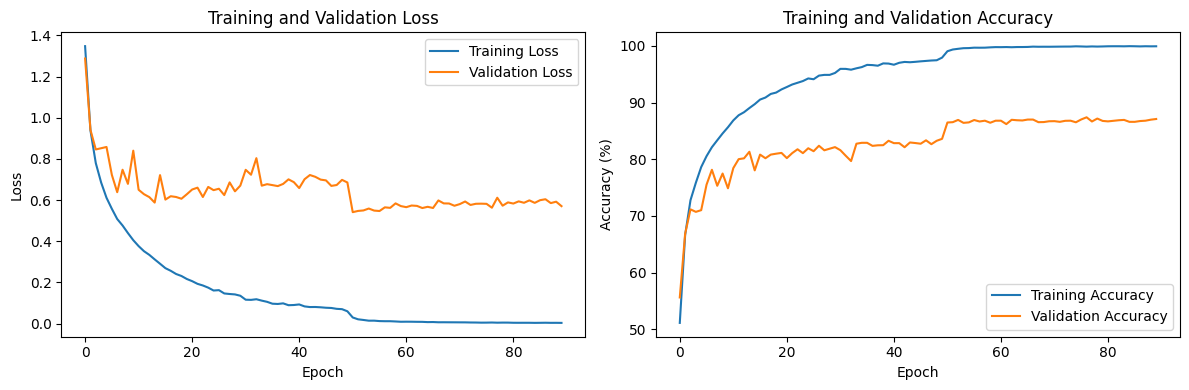

In [ ]:

# Plotting
plt.figure(figsize=(12, 4))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


#test_Evaluation

In [ ]:
# Evaluate the model on the test dataset
model.eval()  # Set the model to evaluation mode

test_loss = 0.0
correct_test = 0
total_test = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Get predicted labels
        _, predicted = outputs.max(1)

        # Update total and correct predictions
        total_test += targets.size(0)
        correct_test += predicted.eq(targets).sum().item()

        # Save predictions and true labels for further analysis if needed
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

# Calculate average test loss
avg_test_loss = test_loss / len(test_loader)

# Calculate test accuracy
test_accuracy = 100. * correct_test / total_test

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 0.5791
Test Accuracy: 87.75%


#CSI

In [ ]:
import torch

def center_si_cal(features, labels):
    n_data, n_feature = features.shape
    n_class = len(torch.unique(labels))

    # Calculate mean features for each class
    class_centers = torch.zeros(n_class, n_feature, device=features.device)
    for c in range(1, n_class + 1):
        class_mask = (labels == c).squeeze(1)
        class_features = features[class_mask]
        if class_features.numel() > 0:  # Check if there are data points for the class
            class_centers[c - 1] = torch.mean(class_features, dim=0)

    # Calculate distances between each data and class centers
    distances = torch.cdist(features, class_centers, p=2)

    # Find the index of the closest center for each data, ignoring nan values
    _, closest_center_index = torch.min(distances.masked_fill(torch.isnan(distances), float('inf')), 1)

    # Assign new labels based on the closest center
    new_labels = closest_center_index + 1  # Adding 1 to convert 0-based index to 1-based label

    # Calculate CSI
    csi = torch.sum(new_labels == labels.squeeze()) / n_data

    return csi



for train dataset

In [ ]:
# Updated balanced splitting function
def __balance_val_split(dataset, val_split=0.):
    if isinstance(dataset, Subset):
        indices = dataset.indices
        targets = np.array(dataset.dataset.targets)[indices]
    else:
        targets = np.array(dataset.targets)

    train_indices, val_indices = train_test_split(
        np.arange(targets.shape[0]),
        test_size=val_split,
        stratify=targets
    )

    if isinstance(dataset, Subset):
        train_dataset = Subset(dataset.dataset, indices=train_indices)
        val_dataset = Subset(dataset.dataset, indices=val_indices)
    else:
        train_dataset = Subset(dataset, indices=train_indices)
        val_dataset = Subset(dataset, indices=val_indices)

    return train_dataset, val_dataset

# Split the train_dataset into two datasets: train_dataset1 and train_dataset2
train_dataset1, dataset = __balance_val_split(train_dataset, val_split=0.1)
# Get the data and labels from the train dataset
data = torch.stack([dataset[i][0] for i in range(len(dataset))]).to(device)
labels = torch.tensor([dataset[i][1] for i in range(len(dataset))], device=device).view(-1, 1)
labels = labels.view(-1, 1)

In [ ]:
data.shape

torch.Size([4500, 3, 32, 32])

In [ ]:
features=None
def hook(module, input, output):
    global features
    features = output
Csilist = []
layerlist = []

for layer_name, layer_module in model.named_children():
  # Register the hook to the last layer
  hook_handle=layer_module.register_forward_hook(hook)

  # Pass data through the model
  with torch.no_grad():
      output = model(data)
  print(layer_name)
  features = features.view(features.size(0), -1)
  # Compute the Separation Index
  Csi = center_si_cal(features, labels)
  Csilist.append(Csi.detach().cpu().numpy())
  layerlist.append(layer_name)
  hook_handle.remove()


conv1
bn1
relu1
maxpool1
conv2
bn2
relu2
maxpool2
conv3_1
bn3_1
relu3_1
conv3_2
bn3_2
relu3_2
maxpool3
conv4_1
bn4_1
relu4_1
conv4_2
bn4_2
relu4_2
maxpool4
conv5_1
bn5_1
relu5_1
conv5_2
bn5_2
relu5_2
maxpool5
fc1
fc2


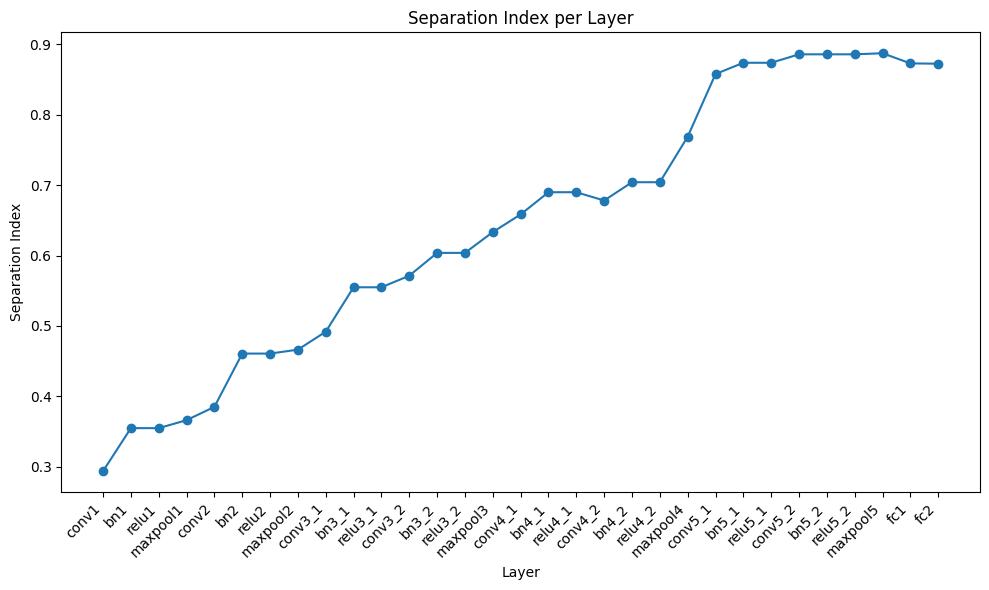

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(layerlist, Csilist, marker='o')
plt.xlabel('Layer')
plt.ylabel('Separation Index')
plt.title('Separation Index per Layer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels are not cut off
plt.show()


#CSI for test dataset

In [ ]:
# Updated balanced splitting function
def __balance_val_split(dataset, val_split=0.):
    if isinstance(dataset, Subset):
        indices = dataset.indices
        targets = np.array(dataset.dataset.targets)[indices]
    else:
        targets = np.array(dataset.targets)

    train_indices, val_indices = train_test_split(
        np.arange(targets.shape[0]),
        test_size=val_split,
        stratify=targets
    )

    if isinstance(dataset, Subset):
        train_dataset = Subset(dataset.dataset, indices=train_indices)
        val_dataset = Subset(dataset.dataset, indices=val_indices)
    else:
        train_dataset = Subset(dataset, indices=train_indices)
        val_dataset = Subset(dataset, indices=val_indices)

    return train_dataset, val_dataset

# Split the train_dataset into two datasets: train_dataset1 and train_dataset2
test_dataset1, dataset = __balance_val_split(test_dataset, val_split=0.45)
# Get the data and labels from the train dataset
data = torch.stack([dataset[i][0] for i in range(len(dataset))]).to(device)
labels = torch.tensor([dataset[i][1] for i in range(len(dataset))], device=device).view(-1, 1)
labels = labels.view(-1, 1)

In [ ]:
data.shape

torch.Size([4500, 3, 32, 32])

In [ ]:
features=None
def hook(module, input, output):
    global features
    features = output
Csilist = []
layerlist = []

for layer_name, layer_module in model.named_children():
  # Register the hook to the last layer
  hook_handle=layer_module.register_forward_hook(hook)

  # Pass data through the model
  with torch.no_grad():
      output = model(data)
  print(layer_name)
  features = features.view(features.size(0), -1)
  # Compute the Separation Index
  Csi = center_si_cal(features, labels)
  Csilist.append(Csi.detach().cpu().numpy())
  layerlist.append(layer_name)
  hook_handle.remove()


conv1
bn1
relu1
maxpool1
conv2
bn2
relu2
maxpool2
conv3_1
bn3_1
relu3_1
conv3_2
bn3_2
relu3_2
maxpool3
conv4_1
bn4_1
relu4_1
conv4_2
bn4_2
relu4_2
maxpool4
conv5_1
bn5_1
relu5_1
conv5_2
bn5_2
relu5_2
maxpool5
fc1
fc2


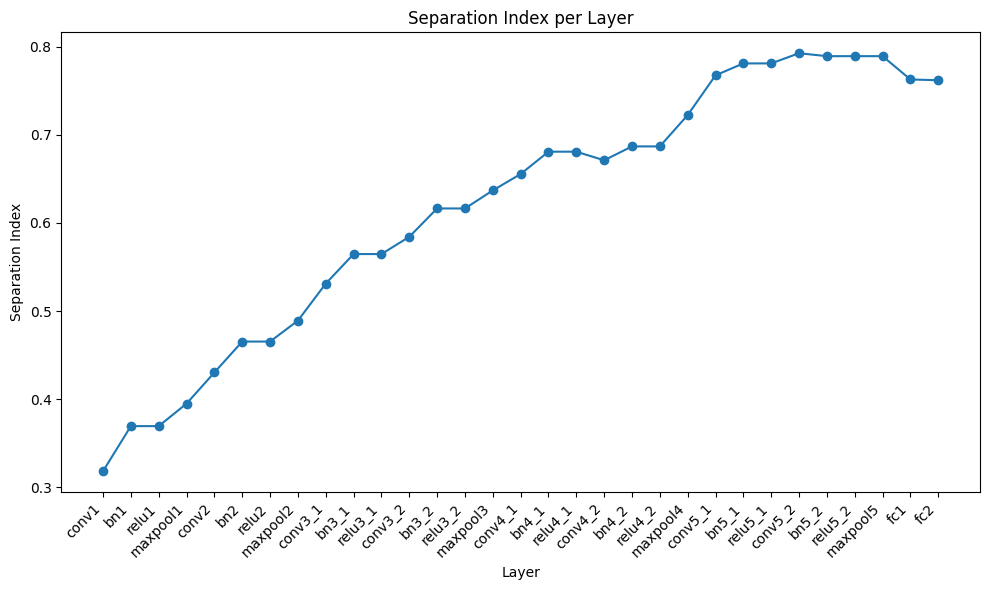

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(layerlist, Csilist, marker='o')
plt.xlabel('Layer')
plt.ylabel('Separation Index')
plt.title('Separation Index per Layer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels are not cut off
plt.show()


#Layer by layer

In [ ]:
import torch.nn as nn

# Define the VGG11 model with the first block and two fully connected layers
class VGG11L1(nn.Module):
    def __init__(self):
        super(VGG11L1, self).__init__()

        # First Block
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 16 * 16, 512)  # Assuming input image size is 32x32 after the first block
        self.fc2 = nn.Linear(512, 10)  # Assuming 10 classes for CIFAR-10

    def forward(self, x):
        # First Block
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Initialize the model
model = VGG11L1()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


VGG11L1(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
# Initialize the model
model = VGG11L1()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy = []

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Validation
    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 1.6315, Validation Loss: 1.4400, Validation Accuracy: 48.22%
Epoch 2/10, Train Loss: 1.3803, Validation Loss: 1.3498, Validation Accuracy: 52.96%
Epoch 3/10, Train Loss: 1.2938, Validation Loss: 1.3127, Validation Accuracy: 54.24%
Epoch 4/10, Train Loss: 1.2468, Validation Loss: 1.2953, Validation Accuracy: 54.96%
Epoch 5/10, Train Loss: 1.2052, Validation Loss: 1.3362, Validation Accuracy: 53.32%
Epoch 6/10, Train Loss: 1.1816, Validation Loss: 1.1925, Validation Accuracy: 58.56%
Epoch 7/10, Train Loss: 1.1407, Validation Loss: 1.1704, Validation Accuracy: 59.46%
Epoch 8/10, Train Loss: 1.1260, Validation Loss: 1.2009, Validation Accuracy: 58.80%
Epoch 9/10, Train Loss: 1.0950, Validation Loss: 1.1540, Validation Accuracy: 59.78%
Epoch 10/10, Train Loss: 1.0831, Validation Loss: 1.1460, Validation Accuracy: 61.00%


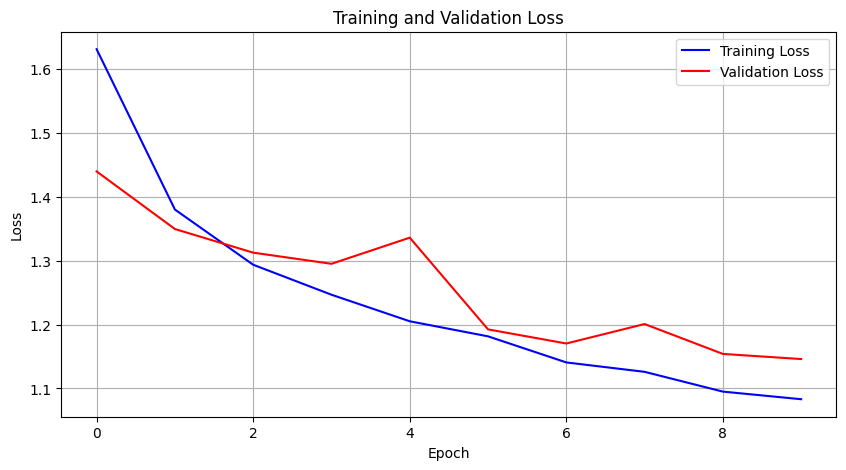

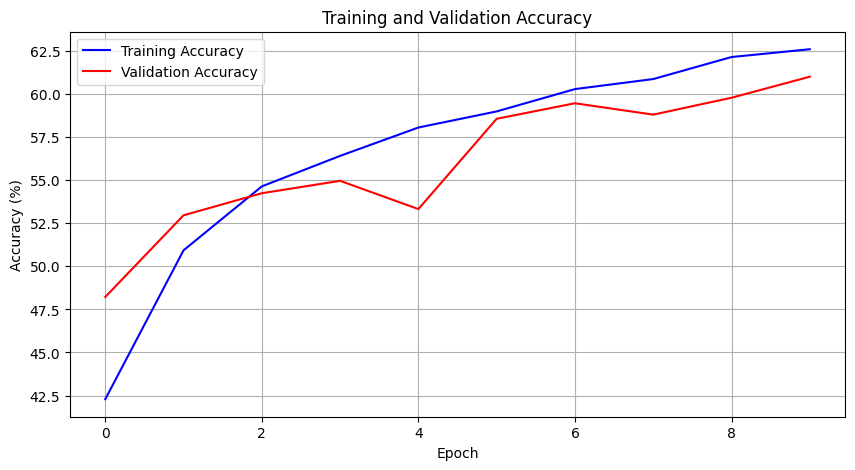

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()


# Save the model weights for future use
# Save only the weights of Block 1
block1_weights = {
    "conv1.weight": model.conv1.weight,
    "conv1.bias": model.conv1.bias,
    "bn1.weight": model.bn1.weight,
    "bn1.bias": model.bn1.bias,
    "bn1.running_mean": model.bn1.running_mean,
    "bn1.running_var": model.bn1.running_var
}

torch.save(block1_weights, "first_block_weights.pth")


layer2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the VGG11 model with both blocks and fully connected layers at the end
class VGG11L2(nn.Module):
    def __init__(self):
        super(VGG11L2, self).__init__()

        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 8 * 8, 512)  # Assuming input size is 16x16 after both blocks
        self.fc2 = nn.Linear(512, 10)  # Assuming 10 classes for CIFAR-10

    def load_block1_weights(self, weights_path):
        block1_weights = torch.load(weights_path)
        # Create a new state dictionary for Block 1
        new_block1_weights = {}
        for key in block1_weights.keys():
            new_key = key.replace("conv1.", "conv1.")
            new_block1_weights[new_key] = block1_weights[key]

        # Load the modified state dictionary
        self.conv1.load_state_dict(new_block1_weights, strict=False)


    def forward(self, x):
        # Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Create an instance of the VGG11 model
model = VGG11L2().to(device)

# Load weights for Block 1 and freeze it
model.load_block1_weights("first_block_weights.pth")
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.bn1.parameters():
    param.requires_grad = False

# Define optimizer and criterion for Block 2
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy=[]
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0  # Correct predictions for training
    total_train = 0    # Total number of training samples

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Calculate validation loss and accuracy
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0  # Correct predictions for validation
    total_val = 0    # Total number of validation samples

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move tensors to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 1.4950, Validation Loss: 1.2728, Validation Accuracy: 54.84%
Epoch 2/10, Train Loss: 1.2157, Validation Loss: 1.2045, Validation Accuracy: 58.12%
Epoch 3/10, Train Loss: 1.1154, Validation Loss: 1.1192, Validation Accuracy: 60.60%
Epoch 4/10, Train Loss: 1.0729, Validation Loss: 1.0747, Validation Accuracy: 62.08%
Epoch 5/10, Train Loss: 1.0324, Validation Loss: 1.0662, Validation Accuracy: 62.08%
Epoch 6/10, Train Loss: 0.9992, Validation Loss: 1.0264, Validation Accuracy: 63.42%
Epoch 7/10, Train Loss: 0.9682, Validation Loss: 1.0339, Validation Accuracy: 64.30%
Epoch 8/10, Train Loss: 0.9529, Validation Loss: 1.0160, Validation Accuracy: 65.06%
Epoch 9/10, Train Loss: 0.9327, Validation Loss: 1.0394, Validation Accuracy: 63.62%
Epoch 10/10, Train Loss: 0.9193, Validation Loss: 1.1056, Validation Accuracy: 61.64%


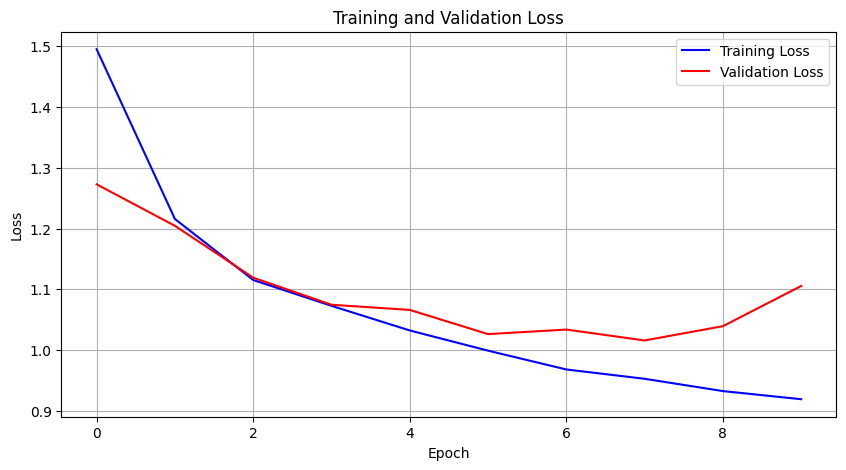

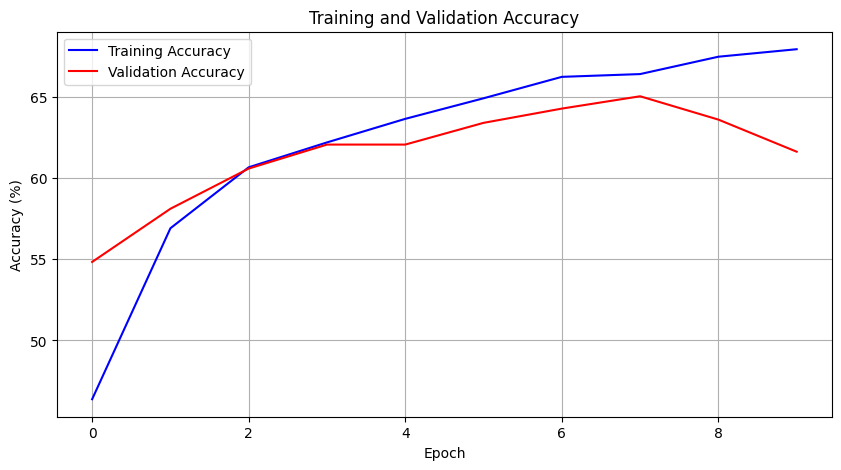

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()

# Save the model weights for future use
# Save only the weights of Block 1
# Create a combined dictionary containing weights of Block 1 and Block 2
combined_weights = {
    "conv1.weight": model.conv1.weight,
    "conv1.bias": model.conv1.bias,
    "bn1.weight": model.bn1.weight,
    "bn1.bias": model.bn1.bias,
    "bn1.running_mean": model.bn1.running_mean,
    "bn1.running_var": model.bn1.running_var,

    "conv2.weight": model.conv2.weight,
    "conv2.bias": model.conv2.bias,
    "bn2.weight": model.bn2.weight,
    "bn2.bias": model.bn2.bias,
    "bn2.running_mean": model.bn2.running_mean,
    "bn2.running_var": model.bn2.running_var
}

# Save the combined weights to a single file
torch.save(combined_weights, "combined_block1_block2_weights.pth")



Layer 3

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class VGG11L3(nn.Module):
    def __init__(self):
        super(VGG11L3, self).__init__()

        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3 (newly added)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU(inplace=True)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 8 * 8, 512)  # Adjusted based on the output size of Block 3
        self.fc2 = nn.Linear(512, 10)  # Assuming 10 classes for CIFAR-10

    def load_block2_weights(self, weights_path):
        block2_weights = torch.load(weights_path)
        new_block2_weights = {}
        for key in block2_weights.keys():
            new_key = key.replace("conv2.", "conv2.")
            new_block2_weights[new_key] = block2_weights[key]
        self.conv2.load_state_dict(new_block2_weights, strict=False)

    def forward(self, x):
        # Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # Block 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Create an instance of the VGG11L3 model
model = VGG11L3().to(device)

# Load weights for Block 2 and freeze it
model.load_block2_weights("combined_block1_block2_weights.pth")
for param in model.conv2.parameters():
    param.requires_grad = False
for param in model.bn2.parameters():
    param.requires_grad = False

# Freeze Block 1
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.bn1.parameters():
    param.requires_grad = False

# Define optimizer and criterion for Block 3
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy=[]
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0  # Correct predictions for training
    total_train = 0    # Total number of training samples

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Calculate validation loss and accuracy
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0  # Correct predictions for validation
    total_val = 0    # Total number of validation samples

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move tensors to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 1.4289, Validation Loss: 1.1907, Validation Accuracy: 57.74%
Epoch 2/10, Train Loss: 1.1621, Validation Loss: 1.3111, Validation Accuracy: 54.66%
Epoch 3/10, Train Loss: 1.0758, Validation Loss: 1.1358, Validation Accuracy: 60.88%
Epoch 4/10, Train Loss: 1.0050, Validation Loss: 1.0900, Validation Accuracy: 61.72%
Epoch 5/10, Train Loss: 0.9767, Validation Loss: 1.1347, Validation Accuracy: 62.50%
Epoch 6/10, Train Loss: 0.9390, Validation Loss: 1.0231, Validation Accuracy: 63.72%
Epoch 7/10, Train Loss: 0.9039, Validation Loss: 0.9948, Validation Accuracy: 66.10%
Epoch 8/10, Train Loss: 0.8821, Validation Loss: 0.9634, Validation Accuracy: 66.90%
Epoch 9/10, Train Loss: 0.8583, Validation Loss: 0.9515, Validation Accuracy: 67.28%
Epoch 10/10, Train Loss: 0.8415, Validation Loss: 0.9587, Validation Accuracy: 66.68%


In [ ]:
# Create a combined dictionary containing weights of Block 1, Block 2, and Block 3
combined_weights = {
    # Block 1
    "conv1.weight": model.conv1.weight,
    "conv1.bias": model.conv1.bias,
    "bn1.weight": model.bn1.weight,
    "bn1.bias": model.bn1.bias,
    "bn1.running_mean": model.bn1.running_mean,
    "bn1.running_var": model.bn1.running_var,

    # Block 2
    "conv2.weight": model.conv2.weight,
    "conv2.bias": model.conv2.bias,
    "bn2.weight": model.bn2.weight,
    "bn2.bias": model.bn2.bias,
    "bn2.running_mean": model.bn2.running_mean,
    "bn2.running_var": model.bn2.running_var,

    # Block 3
    "conv3.weight": model.conv3.weight,
    "conv3.bias": model.conv3.bias,
    "bn3.weight": model.bn3.weight,
    "bn3.bias": model.bn3.bias,
    "bn3.running_mean": model.bn3.running_mean,
    "bn3.running_var": model.bn3.running_var
}

# Save the combined weights to a single file
torch.save(combined_weights, "combined_block1_block2_block3_weights.pth")


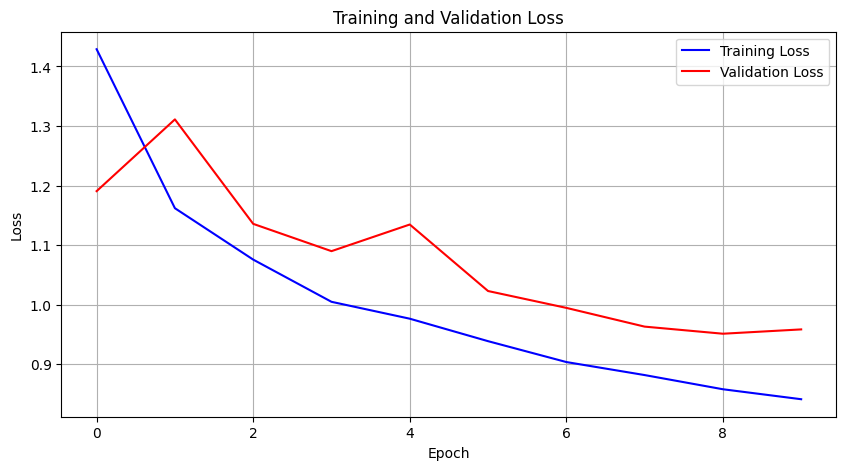

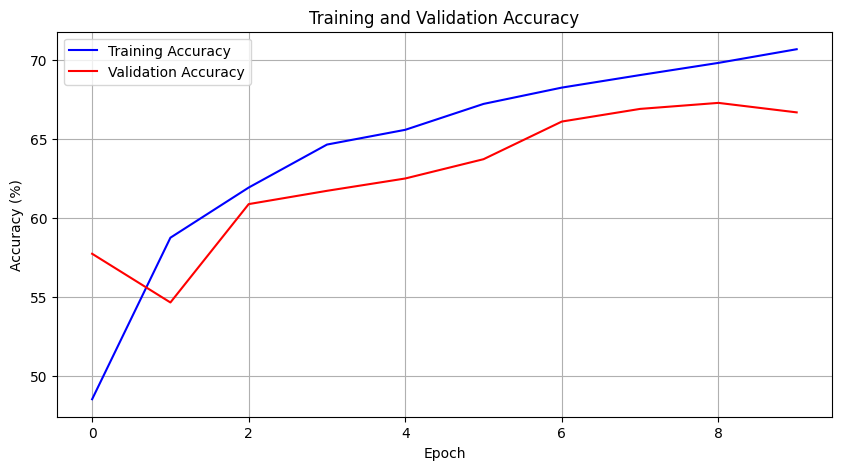

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()

Layer 4

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()

        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU(inplace=True)

        # Block 4
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 512)  # Adjusted input size based on output shape
        self.fc2 = nn.Linear(512, 10)  # Using only the two original fully connected layers for classification

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.maxpool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.relu3(self.bn3(self.conv3(x)))  # Removed maxpool3
        x = self.maxpool4(self.relu4(self.bn4(self.conv4(x))))

        # Flatten the tensor before passing it to fully connected layers
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.fc2(x)

        return x

    def load_combined_weights(self, weights_path):
        # Load the saved combined weights for Block 1, Block 2, and Block 3
        combined_weights = torch.load(weights_path)

        # Load the modified weights into the respective blocks
        self.load_state_dict(combined_weights, strict=False)

# Create an instance of the VGG11 model
model = VGG11().to(device)

# Path to the saved combined weights of Block 1, Block 2, and Block 3
weights_path = "combined_block1_block2_block3_weights.pth"

# Load the combined weights into the model
model.load_combined_weights(weights_path)

# Freeze Block 1, Block 2, and Block 3
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.conv2.parameters():
    param.requires_grad = False
for param in model.conv3.parameters():
    param.requires_grad = False

# Define optimizer and criterion for training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy=[]
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0  # Correct predictions for training
    total_train = 0    # Total number of training samples

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Calculate validation loss and accuracy
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0  # Correct predictions for validation
    total_val = 0    # Total number of validation samples

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move tensors to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 1.1214, Validation Loss: 0.9433, Validation Accuracy: 66.14%
Epoch 2/10, Train Loss: 0.8792, Validation Loss: 0.9387, Validation Accuracy: 67.60%
Epoch 3/10, Train Loss: 0.8361, Validation Loss: 0.8606, Validation Accuracy: 70.22%
Epoch 4/10, Train Loss: 0.7841, Validation Loss: 0.9057, Validation Accuracy: 69.36%
Epoch 5/10, Train Loss: 0.7366, Validation Loss: 0.8393, Validation Accuracy: 71.18%
Epoch 6/10, Train Loss: 0.7070, Validation Loss: 0.8446, Validation Accuracy: 70.74%
Epoch 7/10, Train Loss: 0.6938, Validation Loss: 0.8057, Validation Accuracy: 72.12%
Epoch 8/10, Train Loss: 0.6643, Validation Loss: 0.8959, Validation Accuracy: 68.30%
Epoch 9/10, Train Loss: 0.6508, Validation Loss: 0.7963, Validation Accuracy: 72.62%
Epoch 10/10, Train Loss: 0.6262, Validation Loss: 0.7991, Validation Accuracy: 73.20%


In [ ]:
import torch

# Path to save the combined weights of Block 1, Block 2, Block 3, and Block 4
weights_path = "combined_block1_block2_block3_block4_weights.pth"

# Dictionary to store the combined weights
combined_weights = {
    # Block 1
    "conv1.weight": model.conv1.weight,
    "conv1.bias": model.conv1.bias,
    "bn1.weight": model.bn1.weight,
    "bn1.bias": model.bn1.bias,
    "bn1.running_mean": model.bn1.running_mean,
    "bn1.running_var": model.bn1.running_var,

    # Block 2
    "conv2.weight": model.conv2.weight,
    "conv2.bias": model.conv2.bias,
    "bn2.weight": model.bn2.weight,
    "bn2.bias": model.bn2.bias,
    "bn2.running_mean": model.bn2.running_mean,
    "bn2.running_var": model.bn2.running_var,

    # Block 3
    "conv3.weight": model.conv3.weight,
    "conv3.bias": model.conv3.bias,
    "bn3.weight": model.bn3.weight,
    "bn3.bias": model.bn3.bias,
    "bn3.running_mean": model.bn3.running_mean,
    "bn3.running_var": model.bn3.running_var,

    # Block 4
    "conv4.weight": model.conv4.weight,
    "conv4.bias": model.conv4.bias,
    "bn4.weight": model.bn4.weight,
    "bn4.bias": model.bn4.bias,
    "bn4.running_mean": model.bn4.running_mean,
    "bn4.running_var": model.bn4.running_var
}

# Save the combined weights to a file
torch.save(combined_weights, weights_path)


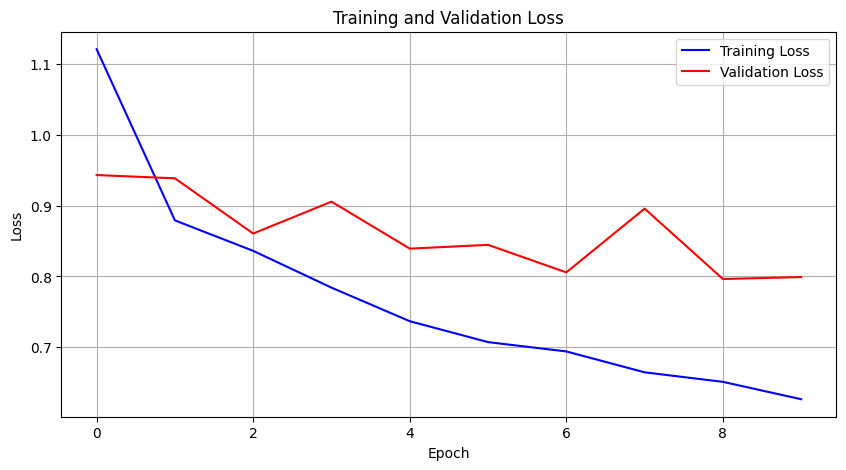

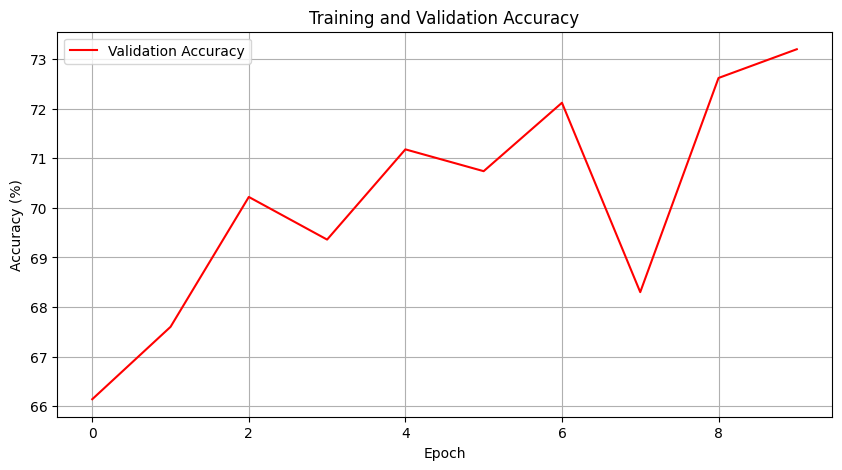

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
#plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch

class VGG11l5(nn.Module):
    def __init__(self):
        super(VGG11l5, self).__init__()

        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU(inplace=True)

        # Block 4
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 5
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4_1 = nn.BatchNorm2d(512)
        self.relu4_1 = nn.ReLU(inplace=True)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 4 * 4, 512)  # Adjusted input size based on output shape
        self.fc2 = nn.Linear(512, 10)  # Using only the two original fully connected layers for classification

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.maxpool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.relu3(self.bn3(self.conv3(x)))
        x = self.maxpool4(self.relu4(self.bn4(self.conv4(x))))
        x = self.relu4_1(self.bn4_1(self.conv4_1(x)))

        # Flatten the tensor before passing it to fully connected layers
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Create an instance of the VGG11 model
model = VGG11l5().to(device)

# Path to the saved combined weights of Block 1, Block 2, Block 3, and Block 4
weights_path = "combined_block1_block2_block3_block4_weights.pth"

# Load the combined weights into the model
combined_weights = torch.load(weights_path)
model.load_state_dict(combined_weights, strict=False)

# Freeze Block 1, Block 2, Block 3, and Block 4
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.conv2.parameters():
    param.requires_grad = False
for param in model.conv3.parameters():
    param.requires_grad = False
for param in model.conv4.parameters():
    param.requires_grad = False

# Define optimizer and criterion for training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy=[]
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0  # Correct predictions for training
    total_train = 0    # Total number of training samples

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Calculate validation loss and accuracy
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0  # Correct predictions for validation
    total_val = 0    # Total number of validation samples

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move tensors to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 0.8366, Validation Loss: 0.8483, Validation Accuracy: 71.06%
Epoch 2/10, Train Loss: 0.6413, Validation Loss: 0.7883, Validation Accuracy: 73.26%
Epoch 3/10, Train Loss: 0.5865, Validation Loss: 0.7954, Validation Accuracy: 72.94%
Epoch 4/10, Train Loss: 0.5557, Validation Loss: 0.7919, Validation Accuracy: 73.08%
Epoch 5/10, Train Loss: 0.5368, Validation Loss: 0.7623, Validation Accuracy: 74.64%
Epoch 6/10, Train Loss: 0.5149, Validation Loss: 0.7592, Validation Accuracy: 75.32%
Epoch 7/10, Train Loss: 0.5008, Validation Loss: 0.7512, Validation Accuracy: 75.26%
Epoch 8/10, Train Loss: 0.4801, Validation Loss: 0.7435, Validation Accuracy: 75.26%
Epoch 9/10, Train Loss: 0.4671, Validation Loss: 0.7597, Validation Accuracy: 74.42%
Epoch 10/10, Train Loss: 0.4506, Validation Loss: 0.7749, Validation Accuracy: 75.34%


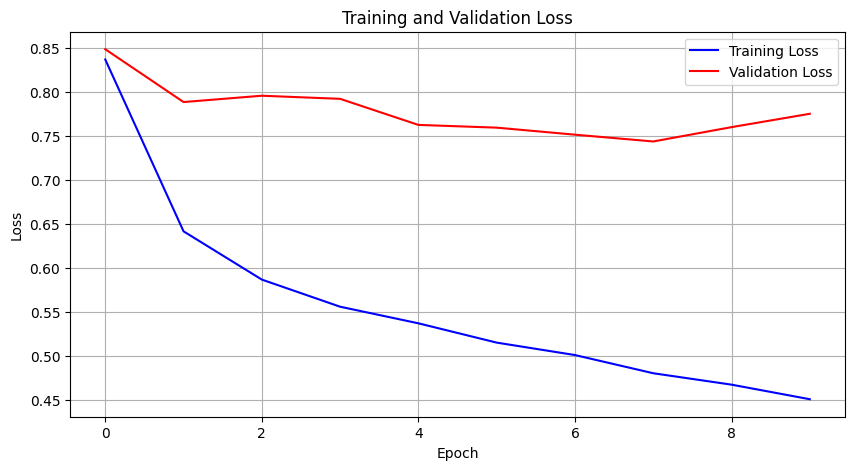

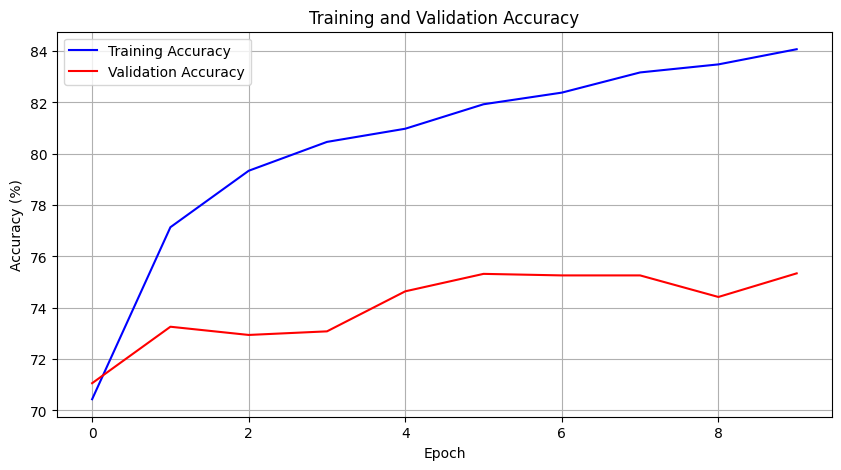

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
weights_save_path = "combined_block1_block2_block3_block4_block5_weights.pth"

# Create a dictionary to hold the state dictionaries of the layers
combined_weights = {}

# Populate the dictionary with the state dictionaries of the layers
combined_weights["conv1.weight"] = model.conv1.weight
combined_weights["conv1.bias"] = model.conv1.bias
combined_weights["bn1.weight"] = model.bn1.weight
combined_weights["bn1.bias"] = model.bn1.bias
combined_weights["bn1.running_mean"] = model.bn1.running_mean
combined_weights["bn1.running_var"] = model.bn1.running_var

combined_weights["conv2.weight"] = model.conv2.weight
combined_weights["conv2.bias"] = model.conv2.bias
combined_weights["bn2.weight"] = model.bn2.weight
combined_weights["bn2.bias"] = model.bn2.bias
combined_weights["bn2.running_mean"] = model.bn2.running_mean
combined_weights["bn2.running_var"] = model.bn2.running_var

combined_weights["conv3.weight"] = model.conv3.weight
combined_weights["conv3.bias"] = model.conv3.bias
combined_weights["bn3.weight"] = model.bn3.weight
combined_weights["bn3.bias"] = model.bn3.bias
combined_weights["bn3.running_mean"] = model.bn3.running_mean
combined_weights["bn3.running_var"] = model.bn3.running_var

combined_weights["conv4.weight"] = model.conv4.weight
combined_weights["conv4.bias"] = model.conv4.bias
combined_weights["bn4.weight"] = model.bn4.weight
combined_weights["bn4.bias"] = model.bn4.bias
combined_weights["bn4.running_mean"] = model.bn4.running_mean
combined_weights["bn4.running_var"] = model.bn4.running_var

combined_weights["conv4_1.weight"] = model.conv4_1.weight
combined_weights["conv4_1.bias"] = model.conv4_1.bias
combined_weights["bn4_1.weight"] = model.bn4_1.weight
combined_weights["bn4_1.bias"] = model.bn4_1.bias
combined_weights["bn4_1.running_mean"] = model.bn4_1.running_mean
combined_weights["bn4_1.running_var"] = model.bn4_1.running_var

# Save the combined weights to the specified path
torch.save(combined_weights, weights_save_path)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the VGG11 model with all the blocks
class VGG11l6(nn.Module):
    def __init__(self):
        super(VGG11l6, self).__init__()
        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU(inplace=True)

        # Block 4
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 5
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4_1 = nn.BatchNorm2d(512)
        self.relu4_1 = nn.ReLU(inplace=True)

        # Block 6
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn4_2 = nn.BatchNorm2d(512)
        self.relu4_2 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 2 * 2, 512)  # Adjusted input size based on output shape of block 6
        self.fc2 = nn.Linear(512, 10)  # Using only the two original fully connected layers for classification

    def forward(self, x):
        # Block 1
        x = self.maxpool1(self.relu1(self.bn1(self.conv1(x))))

        # Block 2
        x = self.maxpool2(self.relu2(self.bn2(self.conv2(x))))

        # Block 3
        x = self.relu3(self.bn3(self.conv3(x)))

        # Block 4
        x = self.maxpool4(self.relu4(self.bn4(self.conv4(x))))

        # Block 5
        x = self.relu4_1(self.bn4_1(self.conv4_1(x)))

        # Block 6
        x = self.maxpool4(self.relu4_2(self.bn4_2(self.conv4_2(x))))

        # Flatten the tensor before passing it to fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Create an instance of the VGG11 model
model = VGG11l6().to(device)

# Path to the saved combined weights of Block 1 through Block 5
weights_path = "combined_block1_block2_block3_block4_block5_weights.pth"

# Load the combined weights into the model
model.load_state_dict(torch.load(weights_path), strict=False)

# Freeze Block 1 through Block 5
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.conv2.parameters():
    param.requires_grad = False
for param in model.conv3.parameters():
    param.requires_grad = False
for param in model.conv4.parameters():
    param.requires_grad = False
for param in model.conv4_1.parameters():
    param.requires_grad = False

# Define optimizer and criterion for training Block 6 and FC layers
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy=[]
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0  # Correct predictions for training
    total_train = 0    # Total number of training samples

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Calculate validation loss and accuracy
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0  # Correct predictions for validation
    total_val = 0    # Total number of validation samples

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move tensors to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 1.1307, Validation Loss: 0.9472, Validation Accuracy: 66.42%
Epoch 2/10, Train Loss: 0.9092, Validation Loss: 0.9236, Validation Accuracy: 66.70%
Epoch 3/10, Train Loss: 0.8432, Validation Loss: 0.8664, Validation Accuracy: 70.12%
Epoch 4/10, Train Loss: 0.8087, Validation Loss: 0.8823, Validation Accuracy: 69.58%
Epoch 5/10, Train Loss: 0.7897, Validation Loss: 0.8613, Validation Accuracy: 69.76%
Epoch 6/10, Train Loss: 0.7491, Validation Loss: 0.8402, Validation Accuracy: 70.22%
Epoch 7/10, Train Loss: 0.7269, Validation Loss: 0.8570, Validation Accuracy: 69.62%
Epoch 8/10, Train Loss: 0.7069, Validation Loss: 0.8659, Validation Accuracy: 69.62%
Epoch 9/10, Train Loss: 0.7049, Validation Loss: 0.8473, Validation Accuracy: 70.22%
Epoch 10/10, Train Loss: 0.6848, Validation Loss: 0.8243, Validation Accuracy: 72.08%


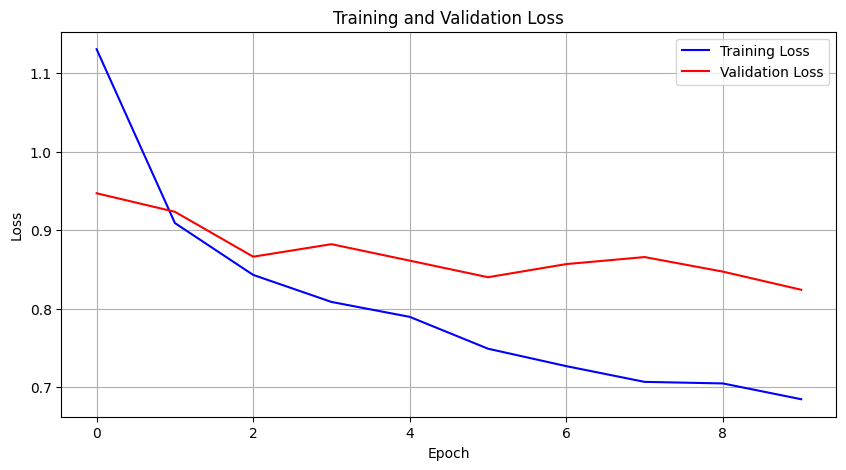

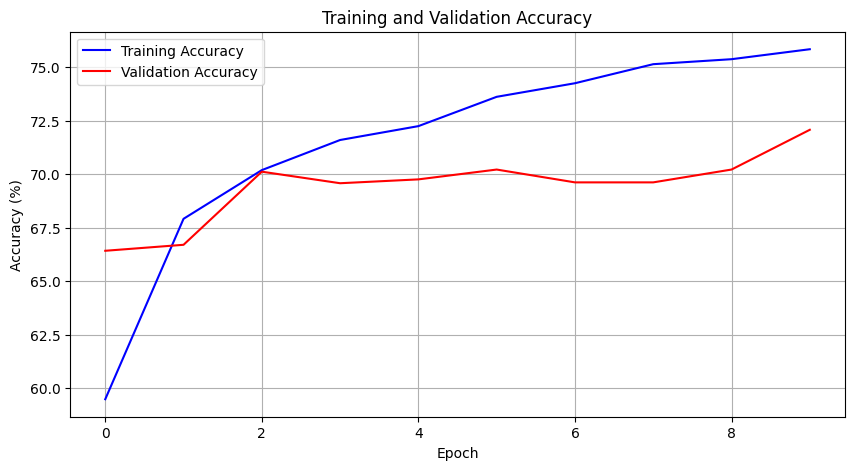

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a combined dictionary containing weights of Block 1 to Block 6
combined_weights = {
    # Block 1
    "conv1.weight": model.conv1.weight,
    "conv1.bias": model.conv1.bias,
    "bn1.weight": model.bn1.weight,
    "bn1.bias": model.bn1.bias,
    "bn1.running_mean": model.bn1.running_mean,
    "bn1.running_var": model.bn1.running_var,

    # Block 2
    "conv2.weight": model.conv2.weight,
    "conv2.bias": model.conv2.bias,
    "bn2.weight": model.bn2.weight,
    "bn2.bias": model.bn2.bias,
    "bn2.running_mean": model.bn2.running_mean,
    "bn2.running_var": model.bn2.running_var,

    # Block 3
    "conv3.weight": model.conv3.weight,
    "conv3.bias": model.conv3.bias,
    "bn3.weight": model.bn3.weight,
    "bn3.bias": model.bn3.bias,
    "bn3.running_mean": model.bn3.running_mean,
    "bn3.running_var": model.bn3.running_var,

    # Block 4
    "conv4.weight": model.conv4.weight,
    "conv4.bias": model.conv4.bias,
    "bn4.weight": model.bn4.weight,
    "bn4.bias": model.bn4.bias,
    "bn4.running_mean": model.bn4.running_mean,
    "bn4.running_var": model.bn4.running_var,

    # Block 5
    "conv4_1.weight": model.conv4_1.weight,
    "conv4_1.bias": model.conv4_1.bias,
    "bn4_1.weight": model.bn4_1.weight,
    "bn4_1.bias": model.bn4_1.bias,
    "bn4_1.running_mean": model.bn4_1.running_mean,
    "bn4_1.running_var": model.bn4_1.running_var,

    # Block 6
    "conv4_2.weight": model.conv4_2.weight,
    "conv4_2.bias": model.conv4_2.bias,
    "bn4_2.weight": model.bn4_2.weight,
    "bn4_2.bias": model.bn4_2.bias,
    "bn4_2.running_mean": model.bn4_2.running_mean,
    "bn4_2.running_var": model.bn4_2.running_var
}

# Save the combined weights to a single file
torch.save(combined_weights, "combined_block1_block2_block3_block4_block5_block6_weights.pth")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the VGG11 model with all the blocks
class VGG11l7(nn.Module):
    def __init__(self):
        super(VGG11l7, self).__init__()

        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU(inplace=True)

        # Block 4
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 5
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4_1 = nn.BatchNorm2d(512)
        self.relu4_1 = nn.ReLU(inplace=True)

        # Block 6
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn4_2 = nn.BatchNorm2d(512)
        self.relu4_2 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 7
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn5_1 = nn.BatchNorm2d(512)
        self.relu5_1 = nn.ReLU(inplace=True)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 2 * 2, 512)  # Adjusted input size based on output shape
        self.fc2 = nn.Linear(512, 10)  # Using only the two original fully connected layers for classification

    def forward(self, x):
        # Block 1
        x = self.maxpool1(self.relu1(self.bn1(self.conv1(x))))

        # Block 2
        x = self.maxpool2(self.relu2(self.bn2(self.conv2(x))))

        # Block 3
        x = self.relu3(self.bn3(self.conv3(x)))

        # Block 4
        x = self.maxpool4(self.relu4(self.bn4(self.conv4(x))))

        # Block 5
        x = self.relu4_1(self.bn4_1(self.conv4_1(x)))

        # Block 6
        x = self.maxpool4(self.relu4_2(self.bn4_2(self.conv4_2(x))))

        # Block 7
        x = self.relu5_1(self.bn5_1(self.conv5_1(x)))

        # Flatten the tensor before passing it to fully connected layers
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Create an instance of the VGG11 model
model = VGG11l7().to(device)

# Path to the saved combined weights of Block 1 to Block 6
weights_path = "combined_block1_block2_block3_block4_block5_block6_weights.pth"

# Load the combined weights into the model
combined_weights = torch.load(weights_path)
model.load_state_dict(combined_weights, strict=False)

# Freeze Block 1 to Block 6
for param in model.parameters():
    param.requires_grad = False

# Allow Block 7 and the fully connected layers to be trained
for param in model.conv5_1.parameters():
    param.requires_grad = True
for param in model.bn5_1.parameters():
    param.requires_grad = True
for param in model.fc1.parameters():
    param.requires_grad = True
for param in model.fc2.parameters():
    param.requires_grad = True

# Define optimizer and criterion for Block 7 and the fully connected layers
optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()



In [ ]:
# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy=[]
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0  # Correct predictions for training
    total_train = 0    # Total number of training samples

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Calculate validation loss and accuracy
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0  # Correct predictions for validation
    total_val = 0    # Total number of validation samples

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move tensors to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 0.8089, Validation Loss: 0.7945, Validation Accuracy: 72.16%
Epoch 2/10, Train Loss: 0.6652, Validation Loss: 0.8112, Validation Accuracy: 72.20%
Epoch 3/10, Train Loss: 0.6242, Validation Loss: 0.7798, Validation Accuracy: 73.34%
Epoch 4/10, Train Loss: 0.6221, Validation Loss: 0.8271, Validation Accuracy: 72.78%
Epoch 5/10, Train Loss: 0.6037, Validation Loss: 0.8140, Validation Accuracy: 71.84%
Epoch 6/10, Train Loss: 0.5968, Validation Loss: 0.8060, Validation Accuracy: 72.92%
Epoch 7/10, Train Loss: 0.5932, Validation Loss: 0.8142, Validation Accuracy: 72.62%
Epoch 8/10, Train Loss: 0.5834, Validation Loss: 0.8084, Validation Accuracy: 73.18%
Epoch 9/10, Train Loss: 0.5758, Validation Loss: 0.7811, Validation Accuracy: 73.48%
Epoch 10/10, Train Loss: 0.5755, Validation Loss: 0.8060, Validation Accuracy: 73.10%


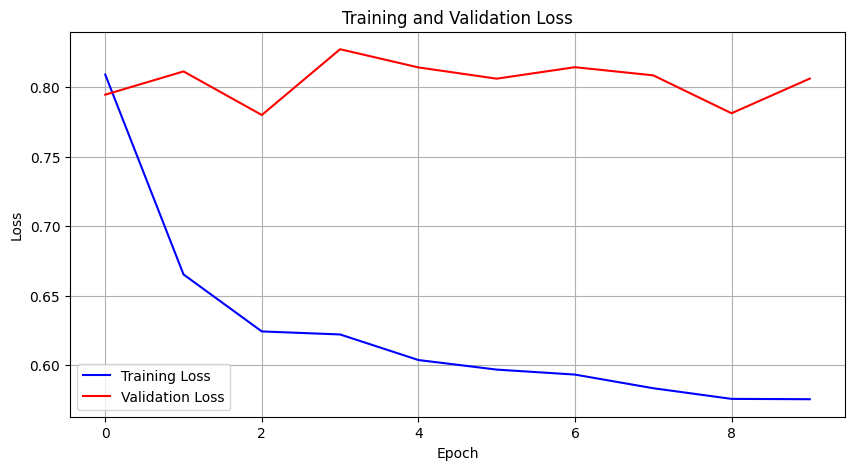

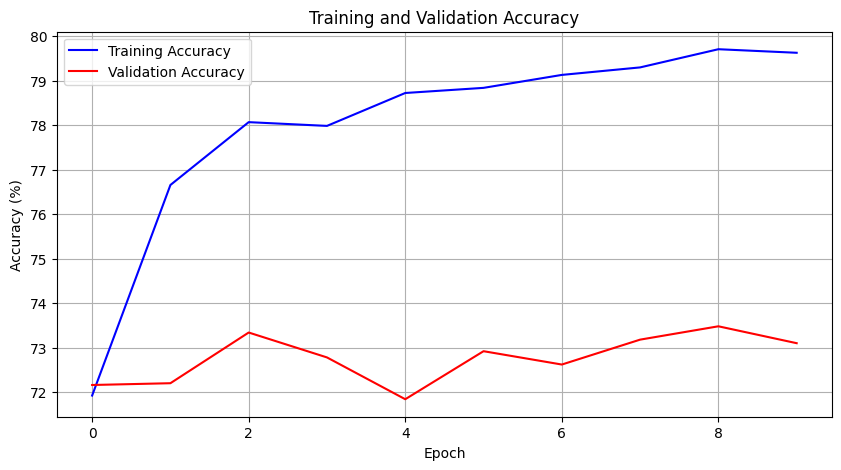

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the path to save the combined weights of Block 1 to Block 7
combined_weights_path = "combined_block1_block2_block3_block4_block5_block6_block7_weights.pth"

# Create a dictionary to hold the weights of all the blocks
combined_weights = {
    # Block 1
    "conv1.weight": model.conv1.weight,
    "conv1.bias": model.conv1.bias,
    "bn1.weight": model.bn1.weight,
    "bn1.bias": model.bn1.bias,
    "bn1.running_mean": model.bn1.running_mean,
    "bn1.running_var": model.bn1.running_var,

    # Block 2
    "conv2.weight": model.conv2.weight,
    "conv2.bias": model.conv2.bias,
    "bn2.weight": model.bn2.weight,
    "bn2.bias": model.bn2.bias,
    "bn2.running_mean": model.bn2.running_mean,
    "bn2.running_var": model.bn2.running_var,

    # Block 3
    "conv3.weight": model.conv3.weight,
    "conv3.bias": model.conv3.bias,
    "bn3.weight": model.bn3.weight,
    "bn3.bias": model.bn3.bias,
    "bn3.running_mean": model.bn3.running_mean,
    "bn3.running_var": model.bn3.running_var,

    # Block 4
    "conv4.weight": model.conv4.weight,
    "conv4.bias": model.conv4.bias,
    "bn4.weight": model.bn4.weight,
    "bn4.bias": model.bn4.bias,
    "bn4.running_mean": model.bn4.running_mean,
    "bn4.running_var": model.bn4.running_var,

    # Block 5
    "conv4_1.weight": model.conv4_1.weight,
    "conv4_1.bias": model.conv4_1.bias,
    "bn4_1.weight": model.bn4_1.weight,
    "bn4_1.bias": model.bn4_1.bias,
    "bn4_1.running_mean": model.bn4_1.running_mean,
    "bn4_1.running_var": model.bn4_1.running_var,

    # Block 6
    "conv4_2.weight": model.conv4_2.weight,
    "conv4_2.bias": model.conv4_2.bias,
    "bn4_2.weight": model.bn4_2.weight,
    "bn4_2.bias": model.bn4_2.bias,
    "bn4_2.running_mean": model.bn4_2.running_mean,
    "bn4_2.running_var": model.bn4_2.running_var,

    # Block 7
    "conv5_1.weight": model.conv5_1.weight,
    "conv5_1.bias": model.conv5_1.bias,
    "bn5_1.weight": model.bn5_1.weight,
    "bn5_1.bias": model.bn5_1.bias,
    "bn5_1.running_mean": model.bn5_1.running_mean,
    "bn5_1.running_var": model.bn5_1.running_var
}

# Save the combined weights to a single file
torch.save(combined_weights, combined_weights_path)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the VGG11 model with Block 8
class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()
        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU(inplace=True)

        # Block 4
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 5
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4_1 = nn.BatchNorm2d(512)
        self.relu4_1 = nn.ReLU(inplace=True)

        # Block 6
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn4_2 = nn.BatchNorm2d(512)
        self.relu4_2 = nn.ReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 7
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn5_1 = nn.BatchNorm2d(512)
        self.relu5_1 = nn.ReLU(inplace=True)

        # Block 8
        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn8 = nn.BatchNorm2d(512)
        self.relu8 = nn.ReLU(inplace=True)
        self.maxpool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 1 * 1, 512)  # Adjusted input size based on output shape
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        # Block 1
        x = self.maxpool1(self.relu1(self.bn1(self.conv1(x))))

        # Block 2
        x = self.maxpool2(self.relu2(self.bn2(self.conv2(x))))

        # Block 3
        x = self.relu3(self.bn3(self.conv3(x)))

        # Block 4
        x = self.maxpool4(self.relu4(self.bn4(self.conv4(x))))

        # Block 5
        x = self.relu4_1(self.bn4_1(self.conv4_1(x)))

        # Block 6
        x = self.maxpool4(self.relu4_2(self.bn4_2(self.conv4_2(x))))

        # Block 7
        x = self.relu5_1(self.bn5_1(self.conv5_1(x)))

        # Block 8
        x = self.maxpool5(self.relu8(self.bn8(self.conv8(x))))

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)

        return x

# Create an instance of the VGG11 model
model = VGG11().to(device)

# Path to the saved combined weights of Block 1 to Block 7
weights_path = "combined_block1_block2_block3_block4_block5_block6_block7_weights.pth"

# Load the combined weights into the model
model.load_state_dict(torch.load(weights_path), strict=False)

# Freeze Block 1 to Block 7
for param in model.parameters():
    param.requires_grad = False

# Allow Block 8 and fully connected layers to be trainable
for param in model.conv8.parameters():
    param.requires_grad = True
for param in model.bn8.parameters():
    param.requires_grad = True
for param in model.fc1.parameters():
    param.requires_grad = True
for param in model.fc2.parameters():
    param.requires_grad = True

# Define optimizer and criterion for training
optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training settings
epochs = 10
train_losses = []
val_losses = []
val_accuracy = []
train_accuracy=[]
# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0  # Correct predictions for training
    total_train = 0    # Total number of training samples

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy
    train_acc = 100 * correct_train / total_train
    train_accuracy.append(train_acc)

    # Calculate validation loss and accuracy
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0  # Correct predictions for validation
    total_val = 0    # Total number of validation samples

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move tensors to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate average losses and accuracy
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_running_loss / len(val_loader))

    # Calculate validation accuracy
    val_acc = 100 * correct_val / total_val
    val_accuracy.append(val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


Epoch 1/10, Train Loss: 0.6418, Validation Loss: 0.8241, Validation Accuracy: 72.94%
Epoch 2/10, Train Loss: 0.5760, Validation Loss: 0.7937, Validation Accuracy: 73.36%
Epoch 3/10, Train Loss: 0.5706, Validation Loss: 0.7876, Validation Accuracy: 73.22%
Epoch 4/10, Train Loss: 0.5677, Validation Loss: 0.7902, Validation Accuracy: 73.46%
Epoch 5/10, Train Loss: 0.5520, Validation Loss: 0.8056, Validation Accuracy: 73.10%
Epoch 6/10, Train Loss: 0.5534, Validation Loss: 0.7959, Validation Accuracy: 73.58%
Epoch 7/10, Train Loss: 0.5447, Validation Loss: 0.8201, Validation Accuracy: 73.04%
Epoch 8/10, Train Loss: 0.5440, Validation Loss: 0.7935, Validation Accuracy: 73.06%
Epoch 9/10, Train Loss: 0.5523, Validation Loss: 0.7906, Validation Accuracy: 73.30%
Epoch 10/10, Train Loss: 0.5438, Validation Loss: 0.7912, Validation Accuracy: 73.66%


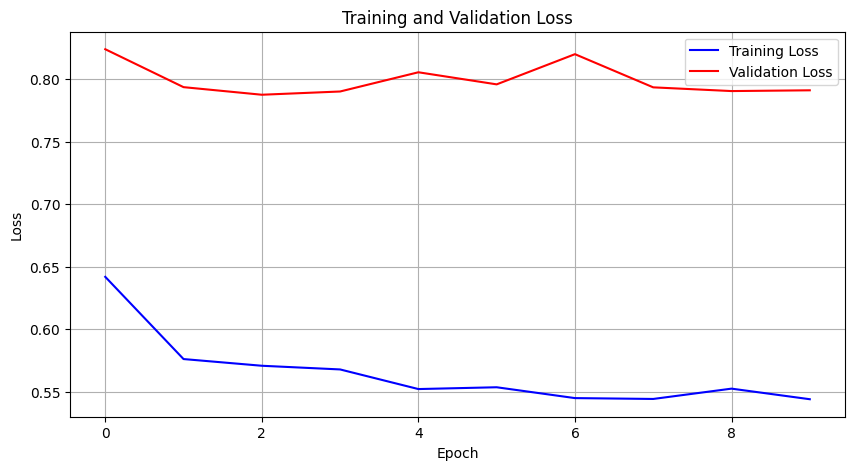

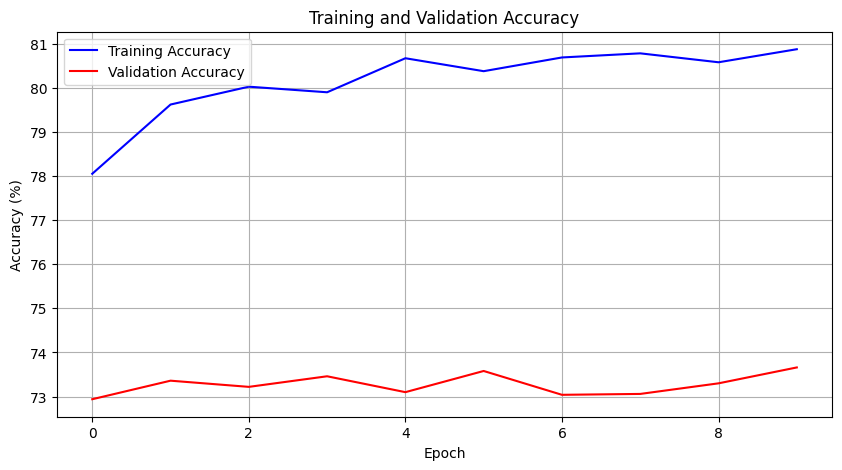

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_losses, label="Training Loss", color='b')
plt.plot(val_losses, label="Validation Loss", color='r')
plt.legend()
plt.grid(True)
plt.show()
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracy, label="Training Accuracy", color='b')
plt.plot(val_accuracy, label="Validation Accuracy", color='r')
plt.legend()
plt.grid(True)
plt.show()

#test


In [ ]:
# Evaluate the model on the test dataset
model.eval()  # Set the model to evaluation mode

test_loss = 0.0
correct_test = 0
total_test = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Get predicted labels
        _, predicted = outputs.max(1)

        # Update total and correct predictions
        total_test += targets.size(0)
        correct_test += predicted.eq(targets).sum().item()

        # Save predictions and true labels for further analysis if needed
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

# Calculate average test loss
avg_test_loss = test_loss / len(test_loader)

# Calculate test accuracy
test_accuracy = 100. * correct_test / total_test

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 0.8584
Test Accuracy: 72.20%
